In [1]:
import numpy as np
import pandas as pd

def generate_square_points(n_points, side_length=100):
    """Generate points evenly along the perimeter of a square."""
    n_side = n_points // 4
    remainder = n_points % 4

    # Define square corners (start bottom-left, go CCW)
    corners = [(0, 0), (side_length, 0), (side_length, side_length), (0, side_length)]
    points = []

    for i in range(4):
        x1, y1 = corners[i]
        x2, y2 = corners[(i + 1) % 4]
        num = n_side + (1 if i < remainder else 0)
        for t in np.linspace(0, 1, num, endpoint=False):
            x = x1 + t * (x2 - x1)
            y = y1 + t * (y2 - y1)
            points.append((x, y))

    return np.array(points)

def generate_triangle_points(n_points, side_length=100):
    """Generate points evenly along an equilateral triangle."""
    n_side = n_points // 3
    remainder = n_points % 3

    # Triangle vertices
    h = np.sqrt(3) / 2 * side_length
    corners = [(0, 0), (side_length, 0), (side_length / 2, h)]
    points = []

    for i in range(3):
        x1, y1 = corners[i]
        x2, y2 = corners[(i + 1) % 3]
        num = n_side + (1 if i < remainder else 0)
        for t in np.linspace(0, 1, num, endpoint=False):
            x = x1 + t * (x2 - x1)
            y = y1 + t * (y2 - y1)
            points.append((x, y))

    return np.array(points)

# === Generate datasets ===
square_points = generate_square_points(100)
triangle_points = generate_triangle_points(100)

# Add depot (0,0) as first row
square_points_with_depot = np.vstack(([0, 0], square_points))
triangle_points_with_depot = np.vstack(([0, 0], triangle_points))

# === Save to CSV ===
pd.DataFrame(square_points_with_depot, columns=["x", "y"]).to_csv("square_100.csv", index=False)
pd.DataFrame(triangle_points_with_depot, columns=["x", "y"]).to_csv("triangle_100.csv", index=False)

print("✅ Datasets generated: square_100.csv and triangle_100.csv")


✅ Datasets generated: square_100.csv and triangle_100.csv


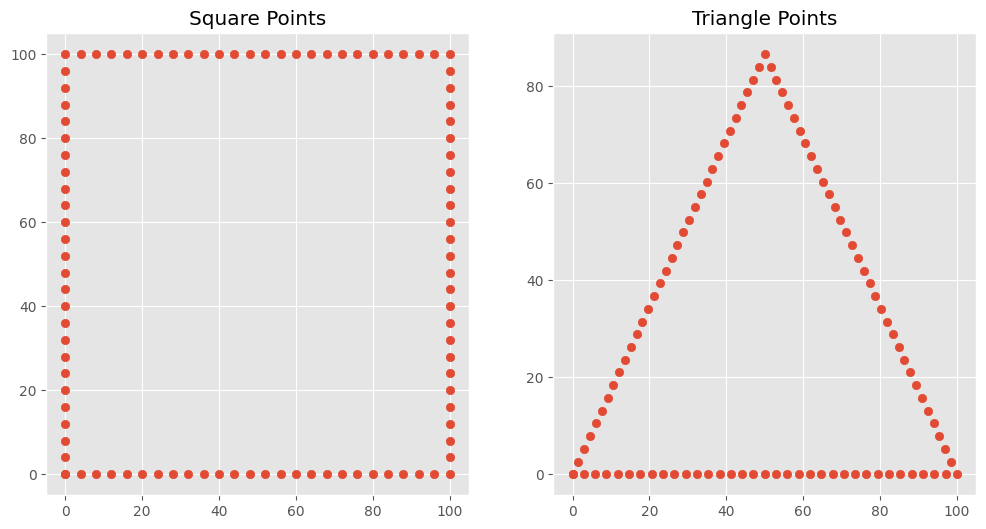

In [2]:
df_square = pd.read_csv("square_100.csv")
df_triangle = pd.read_csv("triangle_100.csv")

import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_square['x'], df_square['y'])
plt.title('Square Points')
plt.subplot(1, 2, 2)
plt.scatter(df_triangle['x'], df_triangle['y'])
plt.title('Triangle Points')

plt.show()